# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import xgboost as xgb

# Data Pre- Processing

In [2]:
data_games=pd.read_csv('/content/games.csv')

In [3]:
data_games.head(2)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1


In [4]:
data_games.shape

(26651, 21)

In [5]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [6]:
data_games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.665100e+04,2.665100e+04,2.665100e+04,26651.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26651.000000
mean,2.175487e+07,1.610613e+09,1.610613e+09,2012.113879,1.610613e+09,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,1.610613e+09,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.587032
std,5.570189e+06,8.638670e+00,8.659299e+00,5.587031,8.638670e+00,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,8.659299e+00,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.492376
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.070001e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120076e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.180005e+07,1.610613e+09,1.610613e+09,2017.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [7]:
data_games.isna().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [8]:

# Rename columns with corrected names
data_games=data_games.rename(columns={'GAME_DATE_EST': 'Date', 'GAME_STATUS_TEXT': 'GAMES_STATUS'})

# Now, the columns should be renamed as expected


In [9]:
data_games= data_games.drop(columns=['TEAM_ID_home', 'TEAM_ID_away'])

Changing columns datatype

In [10]:
data_games['Date']= pd.to_datetime(data_games['Date'])

In [11]:
data_games

,Date,GAME_ID,GAMES_STATUS,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,93.0,0.419,0.821,0.421,24.0,50.0,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,81.0,0.338,0.719,0.381,18.0,40.0,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,98.0,0.448,0.682,0.500,29.0,45.0,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,99.0,0.440,0.771,0.333,21.0,30.0,94.0,0.469,0.725,0.385,18.0,45.0,1


In [12]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             26651 non-null  datetime64[ns]
 1   GAME_ID          26651 non-null  int64         
 2   GAMES_STATUS     26651 non-null  object        
 3   HOME_TEAM_ID     26651 non-null  int64         
 4   VISITOR_TEAM_ID  26651 non-null  int64         
 5   SEASON           26651 non-null  int64         
 6   PTS_home         26552 non-null  float64       
 7   FG_PCT_home      26552 non-null  float64       
 8   FT_PCT_home      26552 non-null  float64       
 9   FG3_PCT_home     26552 non-null  float64       
 10  AST_home         26552 non-null  float64       
 11  REB_home         26552 non-null  float64       
 12  PTS_away         26552 non-null  float64       
 13  FG_PCT_away      26552 non-null  float64       
 14  FT_PCT_away      26552 non-null  float

In [13]:
data_games['GAME_ID'] = data_games['GAME_ID'].astype(str)
data_games['HOME_TEAM_ID'] = data_games['HOME_TEAM_ID'].astype(str)
data_games['VISITOR_TEAM_ID'] = data_games['VISITOR_TEAM_ID'].astype(str)

In [14]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             26651 non-null  datetime64[ns]
 1   GAME_ID          26651 non-null  object        
 2   GAMES_STATUS     26651 non-null  object        
 3   HOME_TEAM_ID     26651 non-null  object        
 4   VISITOR_TEAM_ID  26651 non-null  object        
 5   SEASON           26651 non-null  int64         
 6   PTS_home         26552 non-null  float64       
 7   FG_PCT_home      26552 non-null  float64       
 8   FT_PCT_home      26552 non-null  float64       
 9   FG3_PCT_home     26552 non-null  float64       
 10  AST_home         26552 non-null  float64       
 11  REB_home         26552 non-null  float64       
 12  PTS_away         26552 non-null  float64       
 13  FG_PCT_away      26552 non-null  float64       
 14  FT_PCT_away      26552 non-null  float

In [15]:
data_games['SEASON'] = pd.to_datetime(data_games['SEASON'], format='%Y').dt.strftime('%Y')#.dt.strftime('%Y') then extracts only the year component in string format, effectively displaying the year while keeping it in a datetime-like object.

In [16]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             26651 non-null  datetime64[ns]
 1   GAME_ID          26651 non-null  object        
 2   GAMES_STATUS     26651 non-null  object        
 3   HOME_TEAM_ID     26651 non-null  object        
 4   VISITOR_TEAM_ID  26651 non-null  object        
 5   SEASON           26651 non-null  object        
 6   PTS_home         26552 non-null  float64       
 7   FG_PCT_home      26552 non-null  float64       
 8   FT_PCT_home      26552 non-null  float64       
 9   FG3_PCT_home     26552 non-null  float64       
 10  AST_home         26552 non-null  float64       
 11  REB_home         26552 non-null  float64       
 12  PTS_away         26552 non-null  float64       
 13  FG_PCT_away      26552 non-null  float64       
 14  FT_PCT_away      26552 non-null  float

Data Cleaning

In [17]:
data_games.isna().sum()

Date                0
GAME_ID             0
GAMES_STATUS        0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
PTS_home           99
FG_PCT_home        99
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
dtype: int64

In [18]:
data_games.dropna(inplace=True)

In [19]:
data_games.shape

(26552, 19)


# Data is Clean Now

# Correlation Analysis

In [21]:
data_games.head()

,Date,GAME_ID,GAMES_STATUS,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,113.0,0.441,0.909,0.297,27.0,49.0,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0


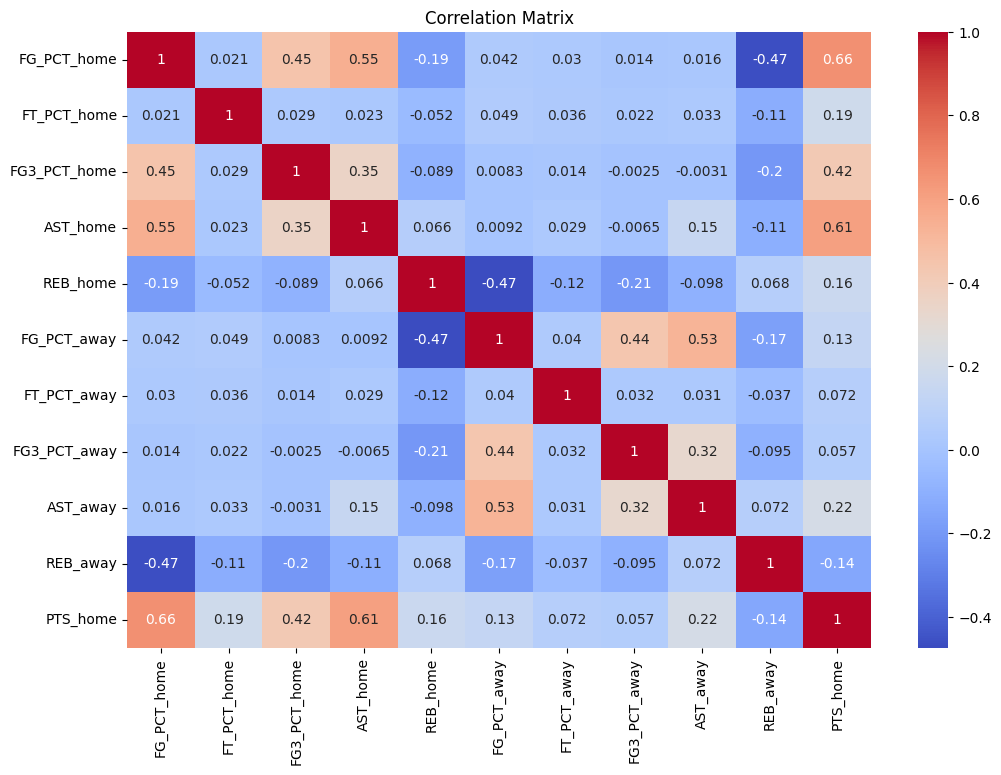

In [22]:
# Selecting potential predictors and the target variable (PTS_home)
predictors = ["FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home",
              "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away"]
target = "PTS_home"

# Creating a new dataframe with just the selected columns
analysis_df = data_games[predictors + [target]]

# Calculating the correlation matrix
correlation_matrix = analysis_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [23]:
data_games.columns

Index(['Date', 'GAME_ID', 'GAMES_STATUS', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID',
       'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home',
       'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [24]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26552 entries, 0 to 26650
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             26552 non-null  datetime64[ns]
 1   GAME_ID          26552 non-null  object        
 2   GAMES_STATUS     26552 non-null  object        
 3   HOME_TEAM_ID     26552 non-null  object        
 4   VISITOR_TEAM_ID  26552 non-null  object        
 5   SEASON           26552 non-null  object        
 6   PTS_home         26552 non-null  float64       
 7   FG_PCT_home      26552 non-null  float64       
 8   FT_PCT_home      26552 non-null  float64       
 9   FG3_PCT_home     26552 non-null  float64       
 10  AST_home         26552 non-null  float64       
 11  REB_home         26552 non-null  float64       
 12  PTS_away         26552 non-null  float64       
 13  FG_PCT_away      26552 non-null  float64       
 14  FT_PCT_away      26552 non-null  float

# Model Data

In [26]:
model_data = data_games[["FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home",
              "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away","PTS_home"]]


In [27]:
model_data.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,PTS_home
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,126.0
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,120.0
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,114.0
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,113.0
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,108.0


Standardization

In [28]:
features = model_data.drop('PTS_home', axis=1)
target = model_data['PTS_home']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.41049671,  1.64512816,  0.23368521, ..., -0.2603184 ,
         0.29139209,  0.28880681],
       [ 0.48107452,  1.90338547,  0.90837918, ..., -0.15066776,
        -0.28994706, -0.78269026],
       [ 0.3752078 ,  0.25451187, -0.38703325, ...,  0.76308755,
        -0.28994706,  0.59494883],
       ...,
       [-0.22470364, -0.77851737,  1.29520373, ...,  1.37530361,
        -0.48372678,  0.1357358 ],
       [-0.36585927,  0.10551727, -0.20711486, ...,  0.324485  ,
        -0.67750649,  0.44187782],
       [-0.52465935, -0.8083163 , -0.20711486, ...,  0.80877532,
        -0.48372678, -0.01733521]])

In [30]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Model 1: Linear Regression

In [31]:
# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.coef_

array([9.55130595, 2.71699863, 1.81576701, 2.03631151, 6.22735181,
       4.59753995, 1.14584873, 0.16051998, 0.12667258, 3.91397505])

In [33]:
home_team_score_prediction= model.predict(X_test)
home_team_score_prediction_train= model.predict(X_train)

In [34]:
# Calculating metrics
mse = mean_squared_error(y_train,home_team_score_prediction_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,home_team_score_prediction_train)
r2 = r2_score(y_train,home_team_score_prediction_train)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 43.569985782009816
Root Mean Squared Error: 6.600756455286759
Mean Absolute Error: 5.1835799898542065
R-squared: 0.7525821888986025


# Model 2: POLYNOMIAL Linear Regression

In [52]:
# Checking for missing values in the dataset
missing_values = data_games.isnull().sum()

# Identifying potential outliers using the interquartile range (IQR) method
# Outliers will be identified for the numerical columns related to the game's performance metrics
numerical_columns = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
                     'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']

outliers = {}
for column in numerical_columns:
    Q1 = data_games[column].quantile(0.25)
    Q3 = data_games[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data_games[(data_games[column] < lower_bound) | (data_games[column] > upper_bound)].shape[0]

print('The following are the missing values:\n', missing_values,'\n','The following are the outliers \n' ,outliers)


The following are the missing values:
 Date               0
GAME_ID            0
GAMES_STATUS       0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64 
 The following are the outliers 
 {'PTS_home': 207, 'FG_PCT_home': 153, 'FT_PCT_home': 209, 'FG3_PCT_home': 381, 'AST_home': 215, 'REB_home': 201, 'PTS_away': 134, 'FG_PCT_away': 197, 'FT_PCT_away': 250, 'FG3_PCT_away': 359, 'AST_away': 187, 'REB_away': 349}



Removing outliers

In [53]:
data_games_cleaned = data_games.dropna()

# Checking the shape of the dataset before and after removal of missing values
original_shape = data_games.shape
cleaned_shape = data_games_cleaned.shape

original_shape, cleaned_shape


((26552, 19), (26552, 19))

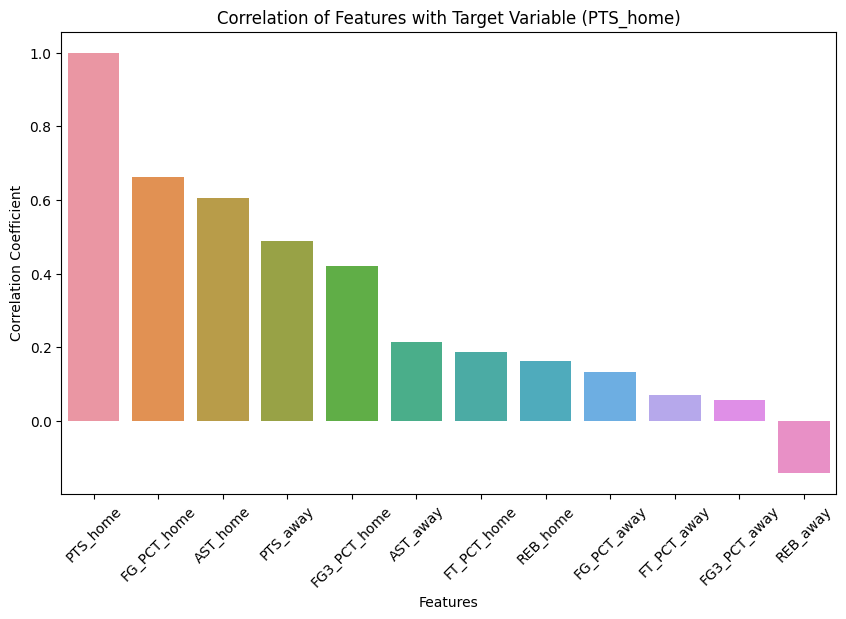

PTS_home        1.000000
FG_PCT_home     0.662165
AST_home        0.605409
PTS_away        0.488061
FG3_PCT_home    0.422342
AST_away        0.215617
FT_PCT_home     0.187056
REB_home        0.162274
FG_PCT_away     0.132131
FT_PCT_away     0.071508
FG3_PCT_away    0.057104
REB_away       -0.140557
Name: PTS_home, dtype: float64

In [54]:
# Selecting the target variable and potential predictor variables
target = 'PTS_home'
predictors = numerical_columns.copy()
predictors.remove(target)

# Calculating the correlation between the predictors and the target variable
correlation_with_target = data_games_cleaned[predictors + [target]].corr()[target].sort_values(ascending=False)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=45)
plt.title('Correlation of Features with Target Variable (PTS_home)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_with_target



In [116]:
selected_features = ["FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home",
              "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away"]


# Creating a DataFrame with selected features
features_df = data_games_cleaned[selected_features]

# Generating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features_df)

# Creating a DataFrame for the polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features_df.columns))

# Displaying the first few rows of the polynomial features DataFrame
poly_features_df.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,...,FT_PCT_away^2,FT_PCT_away FG3_PCT_away,FT_PCT_away AST_away,FT_PCT_away REB_away,FG3_PCT_away^2,FG3_PCT_away AST_away,FG3_PCT_away REB_away,AST_away^2,AST_away REB_away,REB_away^2
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,...,0.664225,0.261615,18.745,35.860,0.103041,7.383,14.124,529.0,1012.0,1936.0
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,...,0.585225,0.254745,15.300,28.305,0.110889,6.660,12.321,400.0,740.0,1369.0
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,...,0.465124,0.295306,13.640,31.372,0.187489,8.660,19.918,400.0,920.0,2116.0
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,...,0.540225,0.191835,11.025,33.810,0.068121,3.915,12.006,225.0,690.0,2116.0
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,...,0.597529,0.225716,15.460,36.331,0.085264,5.840,13.724,400.0,940.0,2209.0


In [93]:
target_data = data_games_cleaned[target]


In [117]:
X_train, X_test, y_train, y_test = train_test_split(poly_features_df, target_data, test_size=0.2, random_state=42)


In [95]:
# Building the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [96]:
home_team_score_prediction= model.predict(X_test)
home_team_score_prediction_train= model.predict(X_train)
# Assuming 'home_team_score_prediction' is your array of predictions
# Rounding predictions to the nearest integer
home_team_score_prediction = np.rint(home_team_score_prediction)

# Converting to integers
home_team_score_prediction = home_team_score_prediction.astype(int)

In [97]:

# Creating a DataFrame for comparison
output_data = pd.DataFrame({
    'Actual Data': y_test,
    'Predicted Data': home_team_score_prediction
}).reset_index(drop=True)

# Displaying the DataFrame
output_data.head()


,Actual Data,Predicted Data
0,120.0,115
1,122.0,119
2,98.0,94
3,86.0,89
4,67.0,84


In [98]:

# Calculating metrics
mse = mean_squared_error(output_data['Actual Data'],output_data['Predicted Data'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(output_data['Actual Data'],output_data['Predicted Data'])
r2 = r2_score(output_data['Actual Data'],output_data['Predicted Data'])

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

print(f"R-squared: {r2}")

Mean Squared Error: 40.435511203163244
Root Mean Squared Error: 6.358892293722488
Mean Absolute Error: 5.015816230465073
R-squared: 0.772501587653443


#Model 3: Ploynomial Regression with degree 3

In [104]:
selected_features = ["FG_PCT_home", "FT_PCT_home", "FG3_PCT_home", "AST_home", "REB_home",
              "FG_PCT_away", "FT_PCT_away", "FG3_PCT_away", "AST_away", "REB_away"]


# Creating a DataFrame with selected features
features_df = data_games_cleaned[selected_features]

# Generating polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(features_df)

# Creating a DataFrame for the polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features_df.columns))

# Displaying the first few rows of the polynomial features DataFrame
poly_features_df.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,...,FG3_PCT_away^3,FG3_PCT_away^2 AST_away,FG3_PCT_away^2 REB_away,FG3_PCT_away AST_away^2,FG3_PCT_away AST_away REB_away,FG3_PCT_away REB_away^2,AST_away^3,AST_away^2 REB_away,AST_away REB_away^2,REB_away^3
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,...,0.033076,2.369943,4.533804,169.809,324.852,621.456,12167.0,23276.0,44528.0,85184.0
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,...,0.036926,2.217780,4.102893,133.200,246.420,455.877,8000.0,14800.0,27380.0,50653.0
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,...,0.081183,3.749780,8.624494,173.200,398.360,916.228,8000.0,18400.0,42320.0,97336.0
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,...,0.017780,1.021815,3.133566,58.725,180.090,552.276,3375.0,10350.0,31740.0,97336.0
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,...,0.024897,1.705280,4.007408,116.800,274.480,645.028,8000.0,18800.0,44180.0,103823.0


In [105]:
X_train, X_test, y_train, y_test = train_test_split(poly_features_df, target_data, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluating the model using R-squared metric
r2_score_test = r2_score(y_test, predictions)
r2_score_test

0.764948248828084

#Model 4: Support Vector Machine

In [108]:

X_train, X_test, y_train, y_test = train_test_split(poly_features_df, target_data, test_size=0.2, random_state=42)

svr_model = make_pipeline(StandardScaler(), SVR())
svr_model.fit(X_train, y_train)

# Making predictions and evaluating the model
svr_predictions = svr_model.predict(X_test)
svr_r2_score = r2_score(y_test, svr_predictions)
svr_r2_score

0.7510757701985349

# Model 5: XGBoost

In [113]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                             learning_rate = 0.1, max_depth = 5,
                             alpha = 10, n_estimators = 10)

# Train the model
xgb_model.fit(X_train, y_train)

0.6238871402433316


In [114]:
# Predicting and evaluating the model
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
print(r2)

0.6238871402433316
